Aluno: Adriano Ulrich do Prado Wiedmann

---


Matrícula: 202014824

In [ ]:
#allows the drive to be accessed
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [ ]:
def warmUpExercise():
    """
    Example function in Python which computes the identity matrix.

    Returns
    -------
    A : array_like
        The 5x5 identity matrix.

    Instructions
    ------------
    Return the 5x5 identity matrix.
    """
    # ======== YOUR CODE HERE ======
    A = np.eye(5,k=0)   # modify this line

    # ==============================
    return A

In [ ]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
# Read comma separated data
data = np.loadtxt(os.path.join('/content/drive/MyDrive/Desafio de programacao 1/Utilidades-TP1/Data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples

In [ ]:
def plotData(X, y):
    """
    Plots the data points x and y into a new figure. Plots the data
    points and gives the figure axes labels of population and profit.

    Parameters
    ----------
    X : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note X and y should have the same size.

    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.

    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You
    can also set the marker edge color using the `mec` property.
    """
    fig = pyplot.figure()  # open a new figure

    pyplot.plot(X, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')

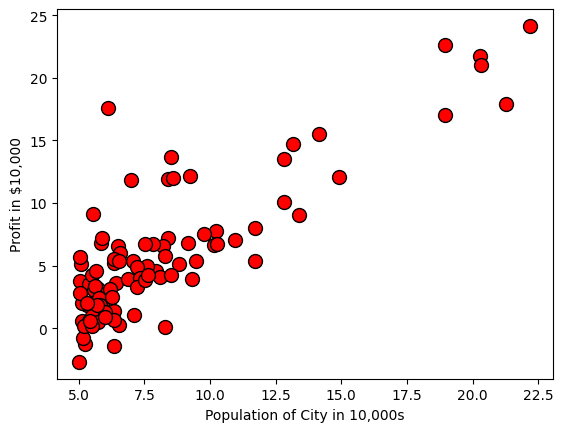

In [ ]:
plotData(X, y)

In [ ]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis.
# The first axis (axis=0) refers to rows (training examples)
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)

In [ ]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already
        appended to the features so we have n+1 columns.

    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).

    theta : array_like
        The parameters for the regression function. This is a vector of
        shape (n+1, ).

    Returns
    -------
    J : float
        The value of the regression cost function.

    Instructions
    ------------
    Compute the cost of a particular choice of theta.
    You should set J to the cost.
    """

    # initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly
    J = 0
    J = 1/(2*m)*np.sum((np.dot(X, theta)-y)**2)  # Cost function

    return J

In [ ]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Com theta = [0, 0] \nCusto calculado = %.2f' % J)
print('Valor de custo esperado (aproximado) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Com theta = [-1, 2]\nCusto calculado = %.2f' % J)
print('Valor de custo esperado (aproximado) 54.24')

Com theta = [0, 0] 
Custo calculado = 32.07
Valor de custo esperado (aproximado) 32.07

Com theta = [-1, 2]
Custo calculado = 54.24
Valor de custo esperado (aproximado) 54.24


In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).

    y : array_like
        Value at given features. A vector of shape (m, ).

    theta : array_like
        Initial values for the linear regression parameters.
        A vector of shape (n+1, ).

    alpha : float
        The learning rate.

    num_iters : int
        The number of iterations for gradient descent.

    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).

    J_history : list
        A python list for the values of the cost function after each iteration.

    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    dim = theta.shape[0] #number of parameters
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()

    J_history = [] # Use a python list to save cost in every iteration

    for i in range(num_iters):
        beta_0=theta[0]-alpha*(1/m)*np.sum((np.dot(X, theta)-y)*X[:,0])
        beta_1=theta[1]-alpha*(1/m)*np.sum((np.dot(X, theta)-y)*X[:,1])
        theta[0]=beta_0
        theta[1]=beta_1
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

In [ ]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrado com o gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Valores esperados de theta (aproximado): [-3.6303, 1.1664]')

Theta encontrado com o gradient descent: -3.6303, 1.1664
Valores esperados de theta (aproximado): [-3.6303, 1.1664]


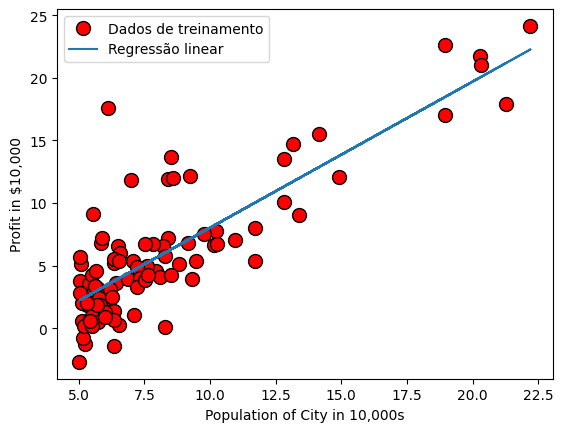

In [ ]:
# plot the linear fit
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Dados de treinamento', 'Regressão linear']);

In [ ]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('Para população = 35,000, nós prevemos um lucro de {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('Para população = 70,000, nós prevemos um lucro de {:.2f}\n'.format(predict2*10000))

Para população = 35,000, nós prevemos um lucro de 4519.77

Para população = 70,000, nós prevemos um lucro de 45342.45



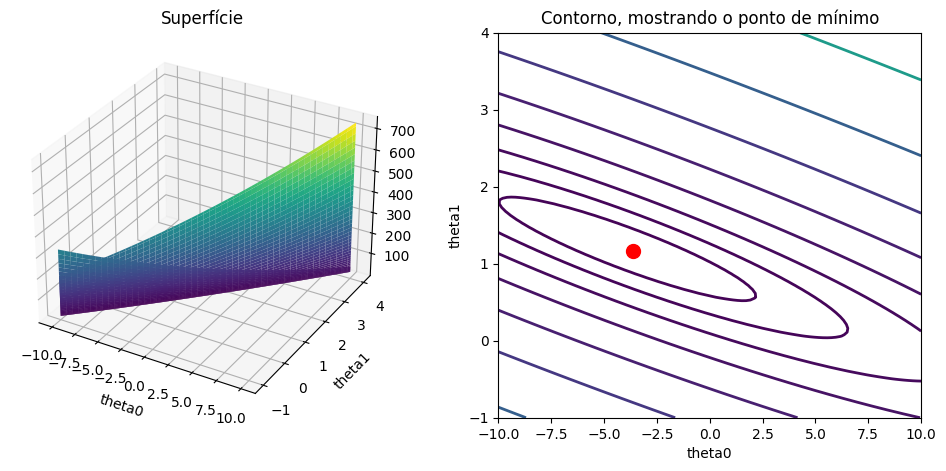

In [ ]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Superfície')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando o ponto de mínimo')
pass

In [ ]:
def plot_J_history(J_history):
    """
    Plot the evolution of the cost function over the iterations.

    Parameters
    ----------
    J_history : list
        list with J values.

    Instructions
    ------------
    Plot the cost function into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    """
    fig = pyplot.figure()  # open a new figure
    pyplot.plot(range(1, len(J_history) + 1), J_history, marker='o')

    # Set labels for the axes
    pyplot.xlabel('Iterations')
    pyplot.ylabel('Cost Function (J)')

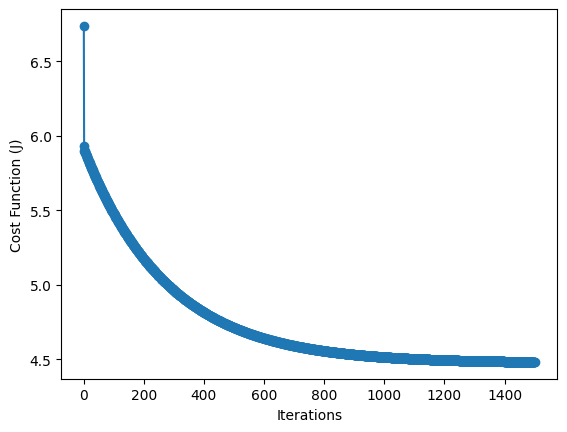

In [ ]:
plot_J_history(J_history)